In [1]:
import torch
import torch.nn as nn
import numpy as np

from datasets.openml_datasets import OpenML_Dataset
from datasets.torch_datasets import Torch_Dataset
from utils.weakener import Weakener
from models.model import MLP
from utils.losses import PartialLoss
from utils.trainig_testing import train_and_evaluate

In [2]:
Data = Torch_Dataset('mnist', batch_size=16)
Weak = Weakener(Data.num_classes)
#Weak.generate_M(model_class='pll')

In [3]:
print('Methods for Data Class','\n',[method for method in dir(Data) if (method[0] != '_') & callable(getattr(Data, method)) ],'\n'
      'Instances for Data Class','\n',[method for method in dir(Data) if (method[0] != '_') & (method not in [method for method in dir(Data) if (method[0] != '_') & callable(getattr(Data, method)) ]) ],'\n\n'
      'Methods for Weak Class','\n',[method for method in dir(Weak) if (method[0] != '_') & callable(getattr(Weak, method)) ],'\n'
      'Instances for Weak Class','\n',[method for method in dir(Weak) if (method[0] != '_') & (method not in [method for method in dir(Weak) if (method[0] != '_') & callable(getattr(Weak, method)) ]) ])

Methods for Data Class 
 ['get_data', 'get_dataloader', 'include_weak', 'transform'] 
Instances for Data Class 
 ['batch_size', 'dataset', 'num_classes', 'num_features', 'shuffle', 'test_dataset', 'test_num_samples', 'train_dataset', 'train_num_samples', 'weak_labels'] 

Methods for Weak Class 
 ['generate_M', 'generate_weak', 'generate_wl_priors', 'label_matrix', 'pll_weights', 'virtual_labels', 'virtual_matrix'] 
Instances for Weak Class 
 ['M', 'c', 'd', 'w', 'z']


In [4]:
Weak.generate_M('pll',pll_p=0.5)
Weak.M[:5,:],Weak.Z[:5,:]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00217014, 0.00217014],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00217014, 0.        , 0.00217014],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00217014, 0.00217014, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00195312, 0.00195312, 0.00195312],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00217014, 0.        , 0.        , 0.00217014]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1]]))

In [5]:
train_X,train_y,test_X,test_y =  Data.get_data()
print(train_X.shape)

torch.Size([60000, 784])


In [6]:
Weak.generate_weak(train_y)

(tensor([616, 801, 879,  ..., 808, 900, 312], dtype=torch.int32),
 tensor([[1., 0., 0.,  ..., 0., 1., 1.],
         [1., 1., 0.,  ..., 1., 0., 0.],
         [1., 1., 0.,  ..., 0., 1., 0.],
         ...,
         [1., 1., 0.,  ..., 0., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 0.,  ..., 0., 1., 0.]], dtype=torch.float64))

In [7]:
train_y[:5,:],Weak.z[:5],Weak.w[:5,:]

(tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 tensor([616, 801, 879, 317, 337], dtype=torch.int32),
 tensor([[1., 0., 0., 1., 1., 1., 0., 0., 1., 1.],
         [1., 1., 0., 0., 1., 0., 1., 1., 0., 0.],
         [1., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
         [0., 1., 0., 1., 0., 0., 0., 1., 1., 1.],
         [0., 1., 0., 1., 0., 1., 1., 0., 1., 1.]], dtype=torch.float64))

In [8]:
Data.include_weak(Weak.w)

In [9]:
trainloader,testloader = Data.get_dataloader()

In [10]:
print('Methods for MLP Class','\n',[method for method in dir(MLP) if (method[0] != '_') & callable(getattr(MLP, method)) ],'\n'
      'Instances for MLP Class','\n',[method for method in dir(MLP) if (method[0] != '_') & (method not in [method for method in dir(MLP) if (method[0] != '_') & callable(getattr(MLP, method))])])

Methods for MLP Class 
 ['add_module', 'apply', 'bfloat16', 'buffers', 'children', 'cpu', 'cuda', 'double', 'eval', 'extra_repr', 'float', 'forward', 'get_buffer', 'get_extra_state', 'get_parameter', 'get_submodule', 'half', 'ipu', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules', 'named_parameters', 'parameters', 'register_backward_hook', 'register_buffer', 'register_forward_hook', 'register_forward_pre_hook', 'register_full_backward_hook', 'register_load_state_dict_post_hook', 'register_module', 'register_parameter', 'requires_grad_', 'set_extra_state', 'share_memory', 'state_dict', 'to', 'to_empty', 'train', 'type', 'xpu', 'zero_grad'] 
Instances for MLP Class 
 ['T_destination', 'dump_patches']


In [11]:
mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes, dropout_p=0.5, bn=True, activation =  'gelu')

In [12]:
trainloader.dataset.tensors[1]

tensor([[1., 0., 0.,  ..., 0., 1., 1.],
        [1., 1., 0.,  ..., 1., 0., 0.],
        [1., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 1., 0.,  ..., 0., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]], dtype=torch.float64)

In [13]:
optim = torch.optim.Adam(mlp.parameters(),lr=1e-2)
loss = PartialLoss(trainloader.dataset.tensors[1])

In [14]:
mlp, results = train_and_evaluate(mlp,trainloader,testloader,optimizer=optim,loss_fn=loss,num_epochs=10,sound=1)

Epoch 10/10: Train Loss: 0.0544, Train Acc: 0.8934, Test Acc: 0.9249


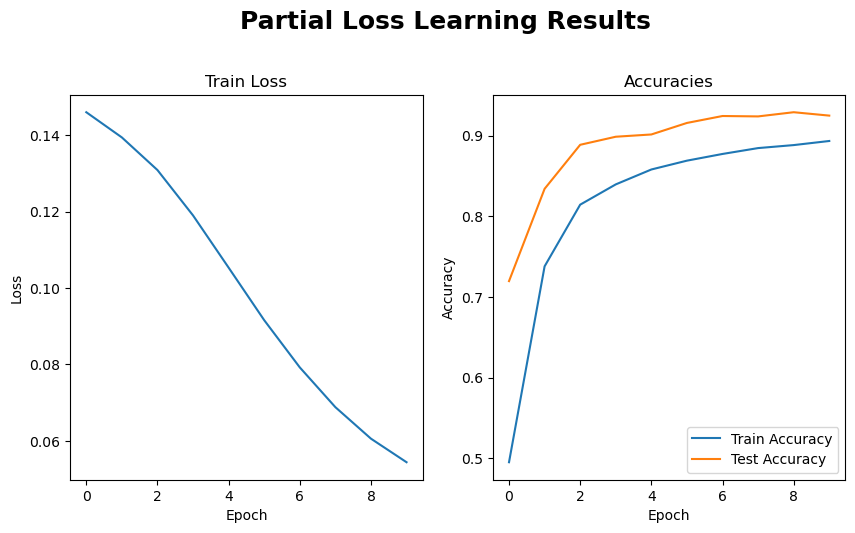

In [17]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot (Train Loss)
ax1.plot(results['train_loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Train Loss')

# Plot the second subplot (Accuracies)
ax2.plot(results['train_acc'], label='Train Accuracy')
ax2.plot(results['test_acc'], label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracies')
ax2.legend()

fig.suptitle('Partial Loss Learning Results', fontsize=18, fontweight='bold', y=1.05)
# Show the plot
plt.show()

In [18]:
mlp, results = train_and_evaluate(mlp,trainloader,testloader,optimizer=optim,loss_fn=loss,num_epochs=10,sound=1)

Epoch 1/10: Train Loss: 0.0498, Train Acc: 0.8964, Test Acc: 0.9293
Epoch 2/10: Train Loss: 0.0463, Train Acc: 0.8992, Test Acc: 0.9296
Epoch 3/10: Train Loss: 0.0438, Train Acc: 0.9012, Test Acc: 0.9379
Epoch 4/10: Train Loss: 0.0421, Train Acc: 0.9022, Test Acc: 0.9315
Epoch 5/10: Train Loss: 0.0405, Train Acc: 0.9053, Test Acc: 0.9384
Epoch 6/10: Train Loss: 0.0393, Train Acc: 0.9072, Test Acc: 0.9423
Epoch 7/10: Train Loss: 0.0385, Train Acc: 0.9074, Test Acc: 0.9416
Epoch 8/10: Train Loss: 0.0378, Train Acc: 0.9092, Test Acc: 0.9425
Epoch 9/10: Train Loss: 0.0371, Train Acc: 0.9100, Test Acc: 0.9471
Epoch 10/10: Train Loss: 0.0365, Train Acc: 0.9113, Test Acc: 0.9425


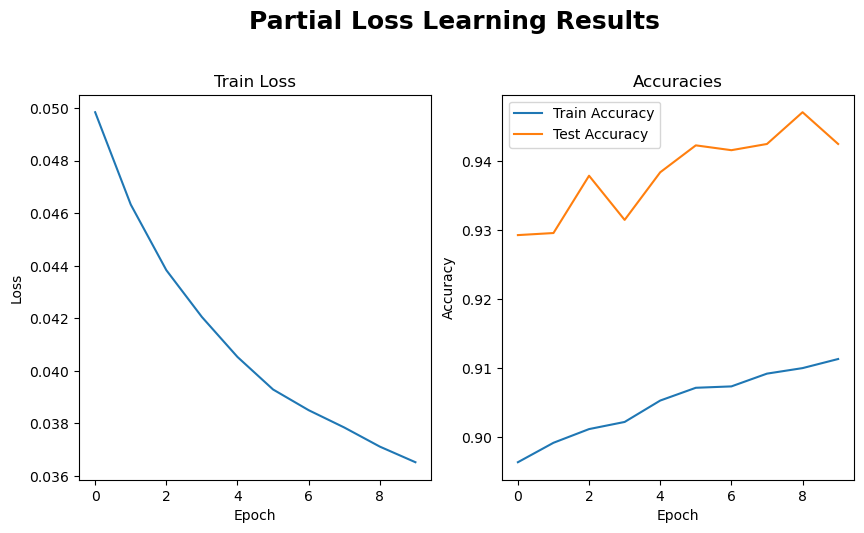

In [19]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot (Train Loss)
ax1.plot(results['train_loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Train Loss')

# Plot the second subplot (Accuracies)
ax2.plot(results['train_acc'], label='Train Accuracy')
ax2.plot(results['test_acc'], label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracies')
ax2.legend()

fig.suptitle('Partial Loss Learning Results', fontsize=18, fontweight='bold', y=1.05)
# Show the plot
plt.show()